<a href="https://colab.research.google.com/github/cemlevent54/Neural_Network_Notes/blob/main/02_simpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

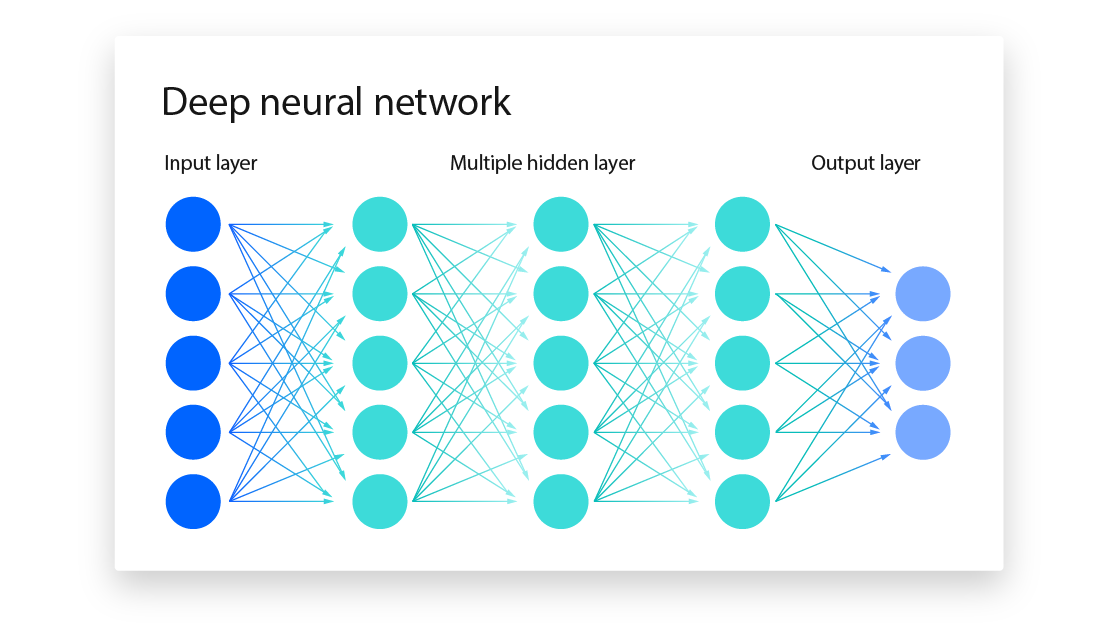

Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)  # Çıkış katmanında aktivasyon fonksiyonu kullanılmaz (genellikle softmax veya başka bir aktivasyon loss fonksiyonunda uygulanır).
        return x



In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)

model = Model()

print(model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_df['species'] = my_df['species'].replace('Setosa',0.0)
my_df['species'] = my_df['species'].replace('Versicolor',1.0)
my_df['species'] = my_df['species'].replace('Virginica',2.0)
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:


X = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)


In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Metinleri sayıya çevirir
y_test = encoder.transform(y_test)

# PyTorch için uygun veri tipine çevir
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations(epochs),
# lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Train model
# Epoches: one run through all the training data in our network
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # meausure the loss/error, gonna be high at first
  loss = criterion(y_pred,y_train)

  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # do some back propagation: take the error rate of forward propagation and
  # feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1225672960281372
Epoch: 10 and loss: 1.0130739212036133
Epoch: 20 and loss: 0.8195203542709351
Epoch: 30 and loss: 0.5979762673377991
Epoch: 40 and loss: 0.4140016436576843
Epoch: 50 and loss: 0.2843182682991028
Epoch: 60 and loss: 0.19448624551296234
Epoch: 70 and loss: 0.13761582970619202
Epoch: 80 and loss: 0.10318296402692795
Epoch: 90 and loss: 0.0839206650853157


📌 Forward Propagation:
Veriyi giriş katmanından alıp, ağırlıklarla hesaplayarak çıkış tahmini üretir.

📌 ReLU Aktivasyon Fonksiyonu:
Öğrenme sürecini daha verimli hale getirir, negatif değerleri sıfıra çeker.

📌 CrossEntropyLoss:
Modelin ne kadar hata yaptığını hesaplar.

📌 Backpropagation:
CrossEntropyLoss ile hesaplanan hata, geri yayılır ve ağırlıklar güncellenir.

Text(0.5, 0, 'Epoch')

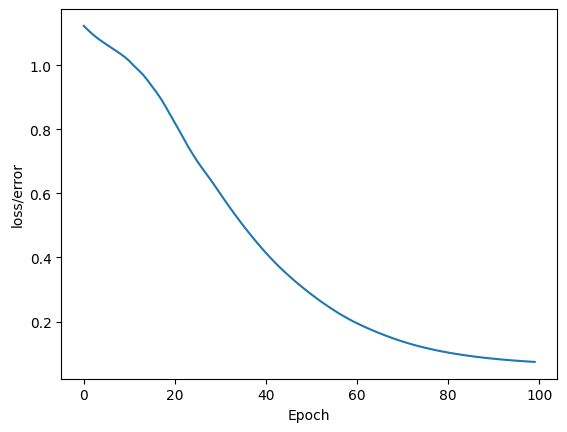

In [ ]:
# graph
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [ ]:
# evaluate model on test data set

with torch.no_grad(): # basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from outer test set, y_eval
  loss = criterion(y_eval,y_test) # find the loss or error

In [ ]:
print(f'Loss on test data set: {loss}')

Loss on test data set: 0.05745886266231537


In [ ]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # what type of model
    print(f'{i+1}.) {str(y_val)} \t {x} \ {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1.) tensor([-4.1716,  5.0314,  2.5291]) 	 Versicolor \ 1
2.) tensor([ 5.1330, -2.7781, -3.1771]) 	 Setosa \ 0
3.) tensor([ 4.0230, -1.7534, -2.6876]) 	 Setosa \ 0
4.) tensor([-4.6494,  5.5576,  2.7156]) 	 Versicolor \ 1
5.) tensor([-6.2048,  4.2263,  6.8880]) 	 Virginica \ 2
6.) tensor([-7.5163,  5.6673,  7.4118]) 	 Virginica \ 2
7.) tensor([ 3.5807, -1.3334, -2.5046]) 	 Setosa \ 0
8.) tensor([ 4.5113, -2.2228, -2.8847]) 	 Setosa \ 0
9.) tensor([-4.2756,  5.4891,  2.1708]) 	 Versicolor \ 1
10.) tensor([ 4.4995, -2.1908, -2.8975]) 	 Setosa \ 0
11.) tensor([-4.7794,  5.8376,  2.5969]) 	 Versicolor \ 1
12.) tensor([-7.2882,  4.4892,  8.3679]) 	 Virginica \ 2
13.) tensor([-2.9024,  4.6610,  0.8063]) 	 Versicolor \ 1
14.) tensor([-3.0202,  4.8000,  0.8698]) 	 Versicolor \ 1
15.) tensor([-6.6180,  4.7994,  6.8852]) 	 Virginica \ 2
16.) tensor([-6.8650,  3.8245,  8.4278]) 	 Virginica \ 2
17.) tensor([-4.4567,  4.8932,  3.1672]) 	 Versicolor \ 1
18.) tensor([-6.0071,  4.8364,  5.8129]) 	 Virgi

Evaluate

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.6208, -2.3305, -2.9270])


In [ ]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-6.0356,  4.4154,  6.3700])


**Save Neural Network Model**

In [ ]:
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<ipython-input-107-3a04575271d5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)